In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=8)
MDP of size 179 / 4 / 657 / 3.7

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=8, maximum_size=0, force_consider_own=True)
MDP of size 16777 / 3 / 78105 / 4.7


,alpha,gamma,horizon,value_eps,model,vi_start_value,vi_iter,vi_time
0,0.35,0.5,200,0.01,their,77.175893,1243,0.506784
1,0.35,0.5,200,0.01,our,79.590126,1409,58.126218
2,0.20,1.0,50,0.01,their,11.442332,267,0.125381
3,0.20,1.0,50,0.01,our,11.281016,272,11.819906
4,0.40,1.0,100,0.01,their,62.314321,770,0.306536
...,...,...,...,...,...,...,...,...
175,0.25,0.0,200,0.01,our,47.418990,1204,47.613572
176,0.10,0.5,50,0.01,their,4.459156,221,0.099654
177,0.10,0.5,50,0.01,our,4.484216,222,10.094140
178,0.00,0.5,50,0.01,their,0.000000,9,0.006873


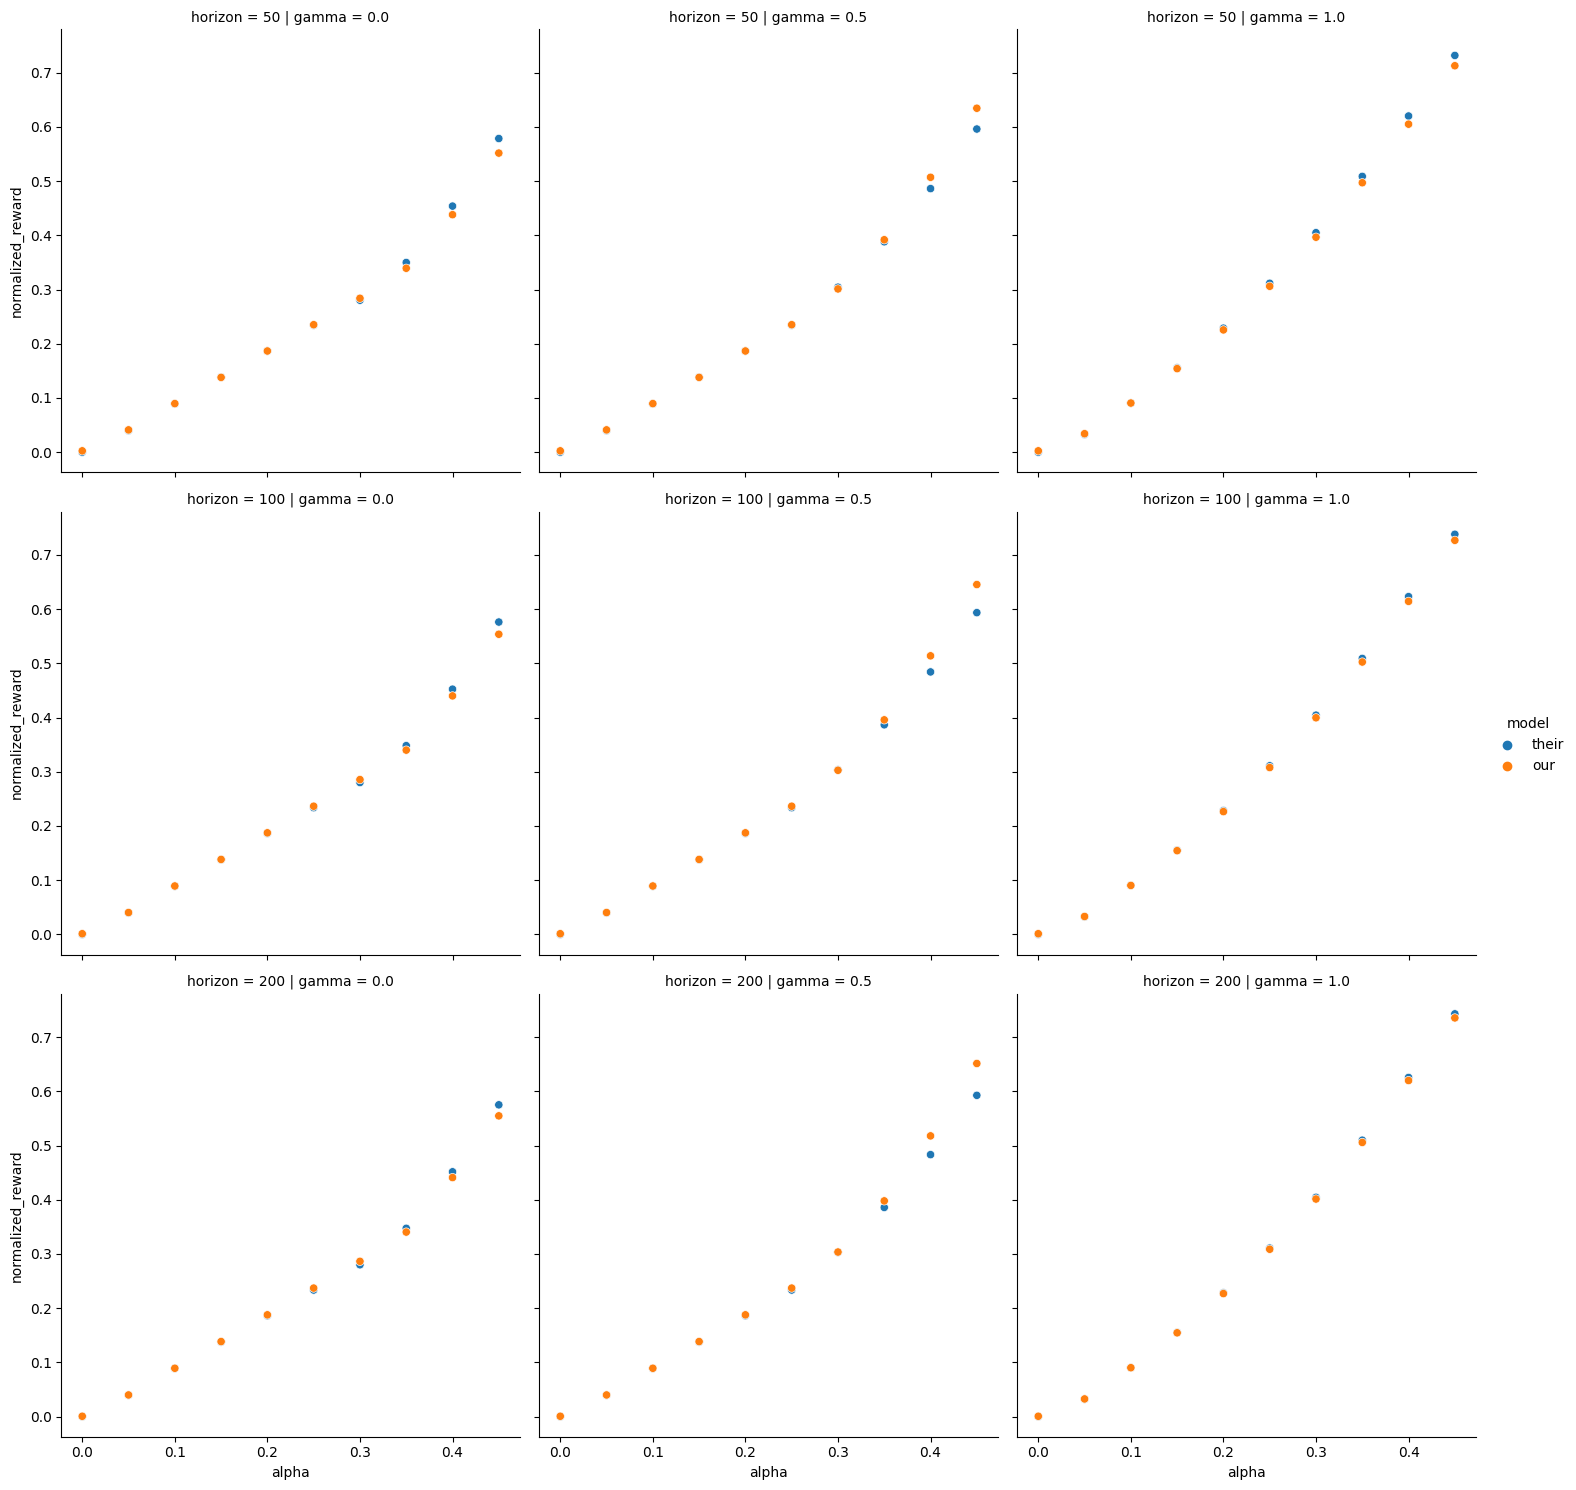

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.vi_start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="horizon",
    hue="model",
)

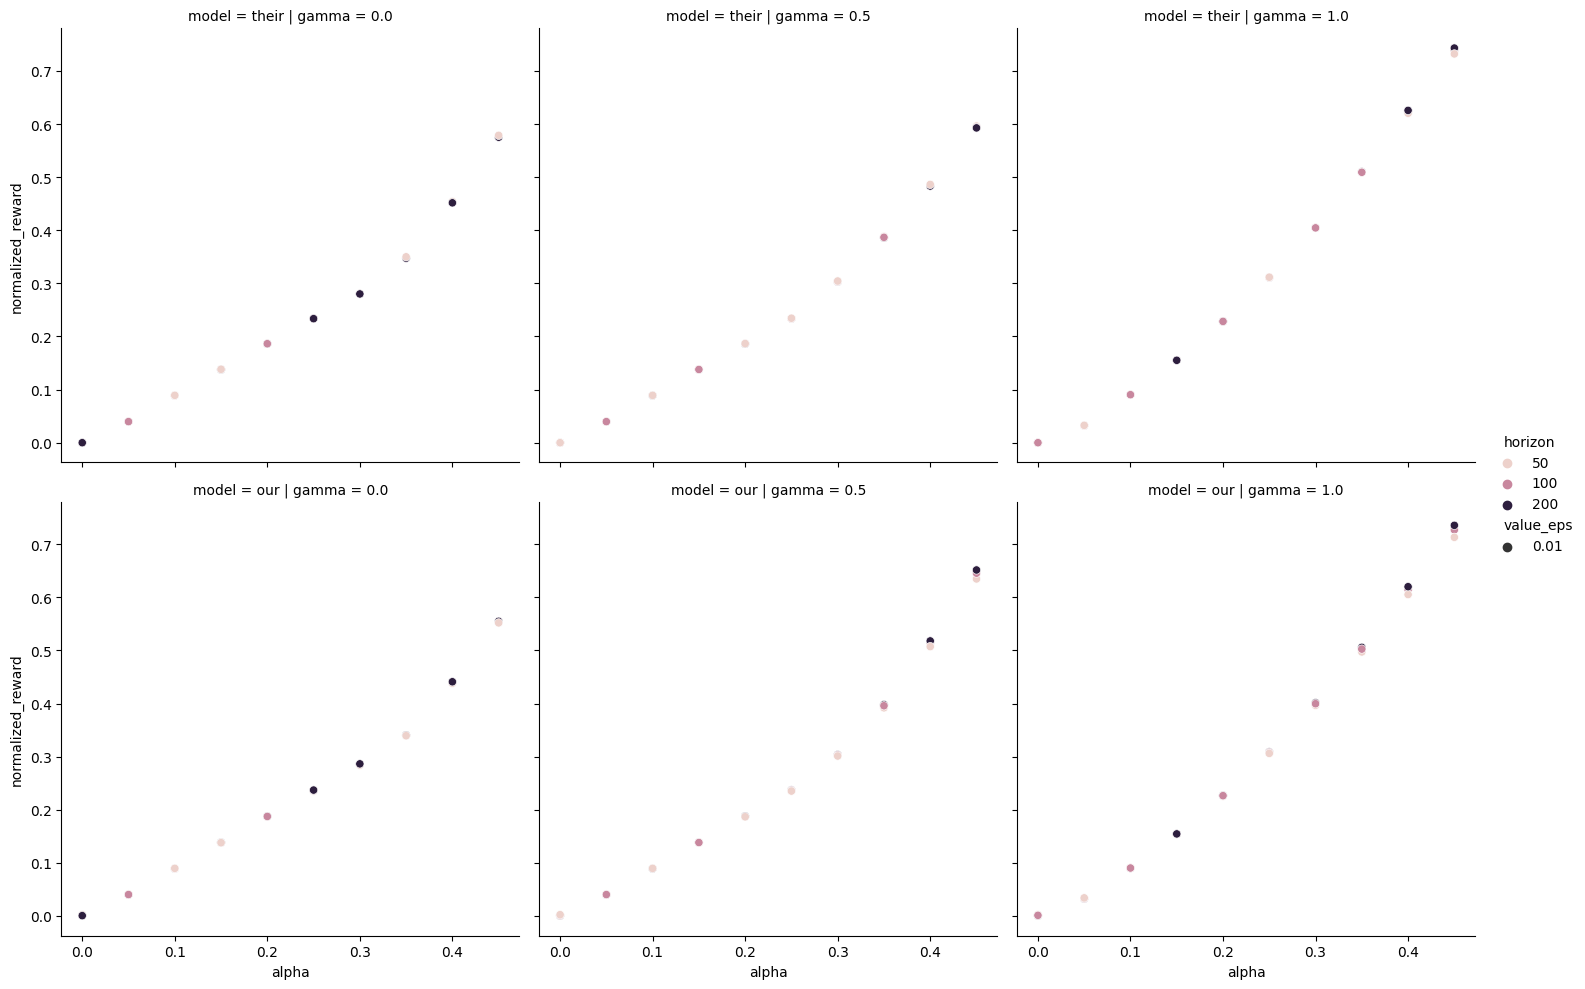

In [4]:
# Demonstrate effect of horizon
sns.relplot(
    data.assign(normalized_reward=lambda x: x.vi_start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

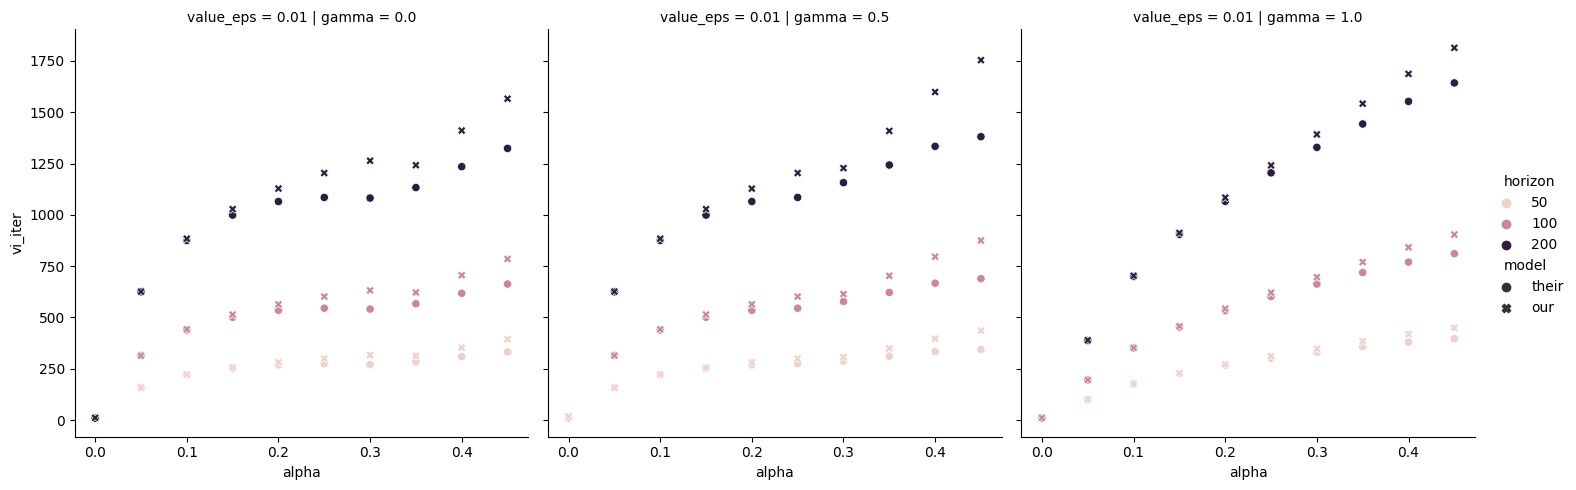

In [5]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

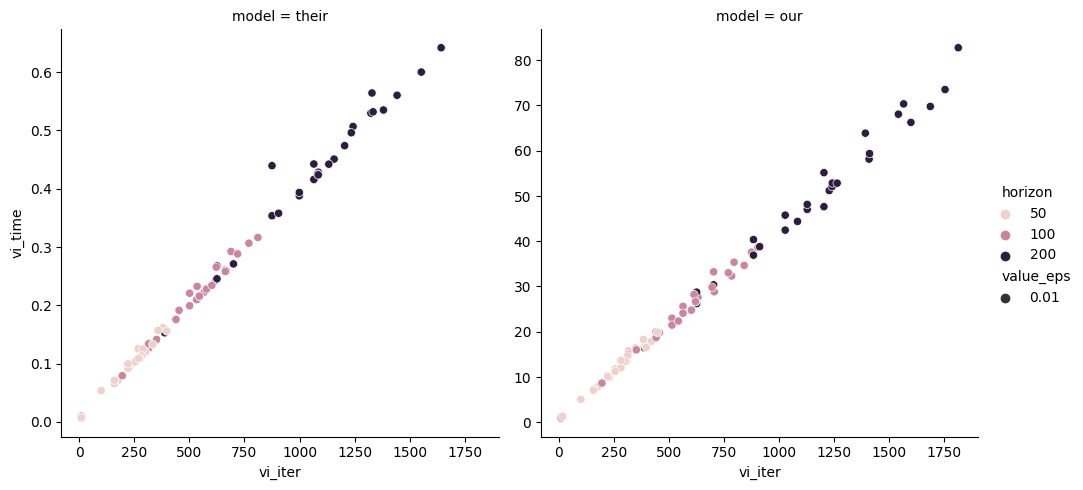

In [6]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)